In [2]:
R = [ 2.3378803662741476e-02, 9.9967347165206788e-01,
1.0314146324401974e-02, 7.8244732224413349e-01,
-1.1874935764705663e-02, -6.2260354465226841e-01,
-6.2227776712034633e-01, 2.2626002202914774e-02,
-7.8246945280440794e-01 ]
t = [ -1.4090767998063891e-02, -2.2633313622261866e-01,
1.0049478890295083e+00 ]
import numpy as np
R = np.array(R).reshape((3,3))
t = np.array(t).reshape((3,1))

def get_camera_pose(R,t):
    # model view matrix 
    MV = np.hstack((R,t))
    MV = np.vstack((MV,(0,0,0,1)))
    print(MV)

    #https://math.stackexchange.com/questions/82602/how-to-find-camera-position-and-rotation-from-a-4x4-matrix
    # position of camera
    cp = np.dot(R.T,t).reshape((-1))
    # orientation of camera
    co = np.dot(R.T,(0,0,1))
    return cp, co
cp, co = get_camera_pose(R,t)
import numpy.linalg as linear
print("camera point",cp,linear.norm(cp))
print("camera orientation",co,linear.norm(co))

[[ 0.0233788   0.99967347  0.01031415 -0.01409077]
 [ 0.78244732 -0.01187494 -0.62260354 -0.22633314]
 [-0.62227777  0.022626   -0.78246945  1.00494789]
 [ 0.          0.          0.          1.        ]]
camera point [-0.80277991  0.01133948 -0.64557055] 1.03021623845
camera orientation [-0.62227777  0.022626   -0.78246945] 1.0


(387, 6)


[[ 0.0233788   0.99967347  0.01031415 -0.01409077]
 [ 0.78244732 -0.01187494 -0.62260354 -0.22633314]
 [-0.62227777  0.022626   -0.78246945  1.00494789]
 [ 0.          0.          0.          1.        ]]
(387, 6)


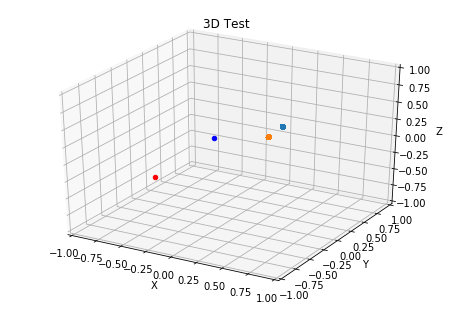

In [30]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
def canvas():
    fig = plt.figure()
    ax = p3.Axes3D(fig)
    # Setting the axes properties
    
    l = 1
    if True:
        ax.set_xlim3d([-l, l])
        ax.set_ylim3d([-l, l])
        ax.set_zlim3d([-l, l])

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Test')
    return fig,ax
    
def draw_points(ax,points):
    ax.scatter(points[:,0],points[:,1],points[:,2])
def draw_point(ax,p,c):
    ax.scatter(p[0],p[1],p[2],c=c)
def draw_vector(ax,s,e):
    vlength = np.linalg.norm(e)*0.3
    print("vector length", vlength)
    ax.quiver(s,e,length = vlength)
    #ax.quiver(start_point[0],start_point[1],start_point[2],end_point[0],end_point[1],end_point[2],length = vlength)

def get_camera_pose(R,t):
    # model view matrix 
    MV = np.hstack((R,t))
    MV = np.vstack((MV,(0,0,0,1)))
    print(MV)

    #https://math.stackexchange.com/questions/82602/how-to-find-camera-position-and-rotation-from-a-4x4-matrix
    # position of camera
    cp = np.dot(R.T,t).reshape((-1))
    # orientation of camera
    co = np.dot(R.T,(0,0,1))
    return cp, co

R = [ 2.3378803662741476e-02, 9.9967347165206788e-01,
1.0314146324401974e-02, 7.8244732224413349e-01,
-1.1874935764705663e-02, -6.2260354465226841e-01,
-6.2227776712034633e-01, 2.2626002202914774e-02,
-7.8246945280440794e-01 ]
t = [ -1.4090767998063891e-02, -2.2633313622261866e-01,
1.0049478890295083e+00 ]
import numpy as np
R = np.array(R).reshape((3,3))
t = np.array(t).reshape((3,1))
cp, co = get_camera_pose(R,t)

fig, ax = canvas()
import numpy as np
robot_pos = np.load('robot_arms.npy')
print(robot_pos.shape)
    
#ax.scatter(j1z,j1x,j1y)
# draw_vector(ax,joints_react[0,:],joints_react[-2,:])    
draw_point(ax, cp, c='r')
draw_point(ax, cp-2*co, c='b')
draw_points(ax, robot_pos[:,:3])
draw_points(ax, robot_pos[:,-3:])
plt.show()